# **Polynomial Regression**

In [15]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Sample dataset
data = {
    'Study_Hours': [x for x in range(1,11)],
    'Exam_Score': [50, 65, 75, 80, 85, 88, 89, 88, 85, 80]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)
df

,Study_Hours,Exam_Score
0,1,50
1,2,65
2,3,75
3,4,80
4,5,85
5,6,88
6,7,89
7,8,88
8,9,85
9,10,80


In [13]:
# Extract the features (Study_Hours) and target (Exam_Score)

X = df[['Study_Hours']]
y = df['Exam_Score']

In [14]:
# Fit linear regression for comparison
lr = LinearRegression()
lr.fit(X, y)

# Fit polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)

LinearRegression()

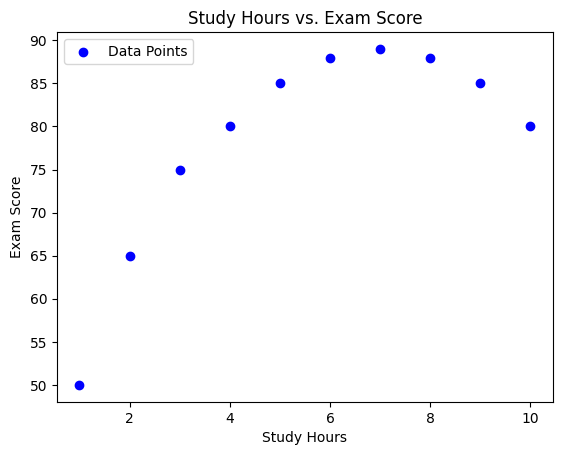

In [16]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs. Exam Score')
plt.legend()
plt.show()

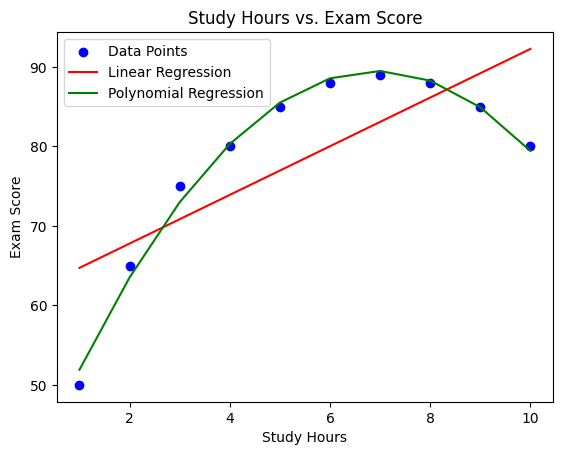

Linear Regression - MSE: 61.37, R^2: 0.56
Polynomial Regression - MSE: 1.12, R^2: 0.99


In [20]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, lr.predict(X), color='red', label='Linear Regression')
plt.plot(X, lr_poly.predict(poly.transform(X)), color='green', label='Polynomial Regression')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs. Exam Score')
plt.legend()
plt.show()

mse_lr = mean_squared_error(y, lr.predict(X))
r2_r = r2_score(y, lr.predict(X))

mse_poly = mean_squared_error(y, lr_poly.predict(poly.transform(X)))
r2_p = r2_score(y, lr_poly.predict(poly.transform(X)))

print(f"Linear Regression - MSE: {mse_lr:.2f}, R^2: {r2_r:.2f}")
print(f"Polynomial Regression - MSE: {mse_poly:.2f}, R^2: {r2_p:.2f}")


------------------Degree 2 - MSE: 1.12, R^2: 0.99------------------


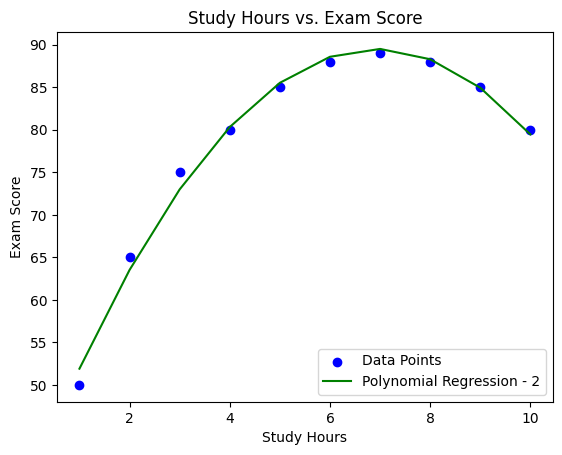


------------------Degree 3 - MSE: 0.61, R^2: 1.00------------------


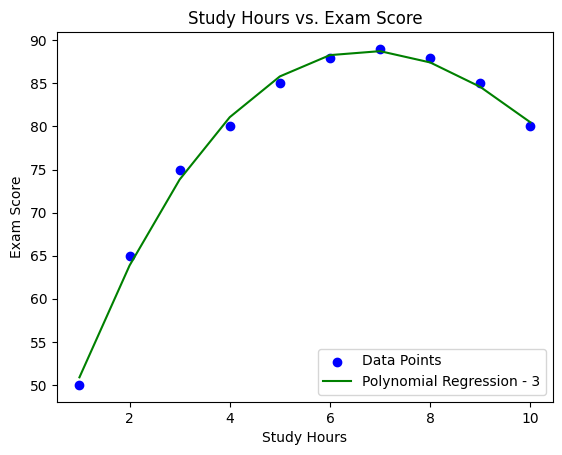


------------------Degree 4 - MSE: 0.19, R^2: 1.00------------------


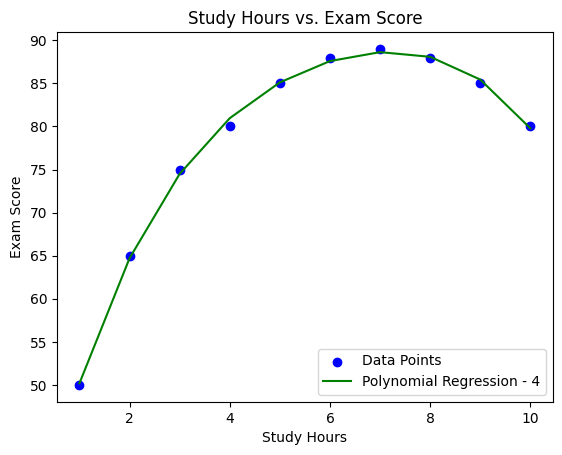


------------------Degree 5 - MSE: 0.07, R^2: 1.00------------------


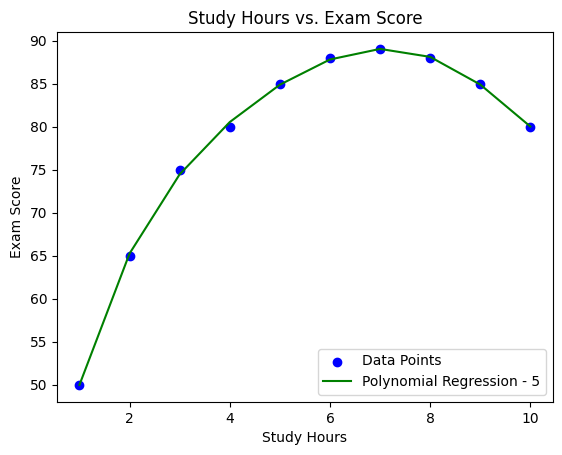


------------------Degree 6 - MSE: 0.07, R^2: 1.00------------------


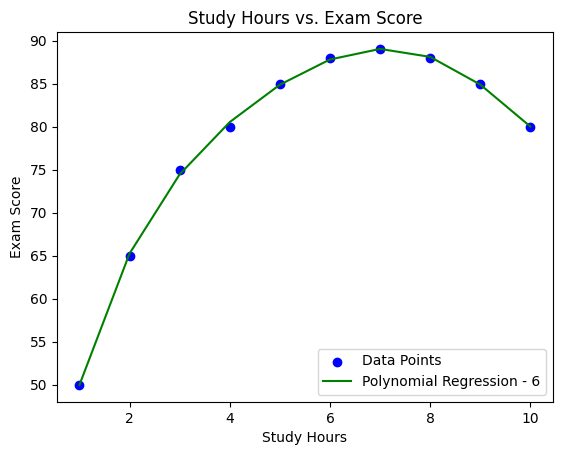


------------------Degree 7 - MSE: 0.04, R^2: 1.00------------------


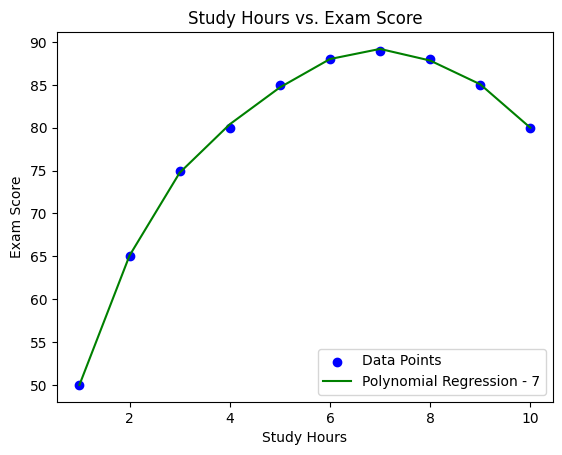

In [24]:
for deg in range(2,8):
  # Fit polynomial regression
  poly = PolynomialFeatures(degree=deg)
  X_poly = poly.fit_transform(X)
  lr_poly = LinearRegression()
  lr_poly.fit(X_poly, y)

  mse = mean_squared_error(y, lr_poly.predict(poly.transform(X)))
  r2 = r2_score(y, lr_poly.predict(poly.transform(X)))
  print(f"\n"+f"-"*18 + f"Degree {deg} - MSE: {mse:.2f}, R^2: {r2:.2f}" + f"-"*18)

  plt.scatter(X, y, color='blue', label='Data Points')
  plt.plot(X, lr_poly.predict(poly.transform(X)), color='green', label=f'Polynomial Regression - {deg}')
  plt.xlabel('Study Hours')
  plt.ylabel('Exam Score')
  plt.title('Study Hours vs. Exam Score')
  plt.legend()
  plt.show()

# **Exponential Regression**

In [ ]:
# Import libraries
from

In [40]:
df = pd.DataFrame({
    "Date": [d for d in range(1,11)],
    "Engaged Users": [100,150,225,338,507,761,1142,1713,2570,3855]
})

In [41]:
X = df[['Date']]
y = df['Engaged Users']

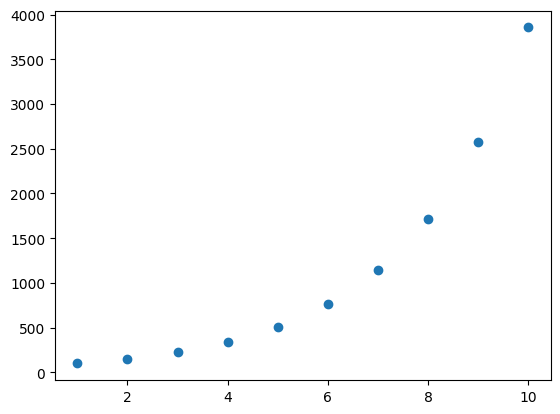

In [42]:
plt.scatter(X, y)
plt.show()

In [44]:
#fit the model
fit = np.polyfit(X['Date'], np.log(y), 1)

#view the output of the model
print(fit)

[0.40583567 4.19924597]


$Ln(y) = 4.1993 + 0.4058x$

$y = e^{4.1993} \cdot e^{0.4058x}$

$y = 66.6397e^{0.4058x}$

In [49]:
np.exp(fit[1])

np.float64(66.63606643129881)

In [50]:
def y_exp(x, fit):
  return np.exp(fit[1])*np.exp(fit[0]*x)

In [56]:
lr = LinearRegression()
lr.fit(X, y)

y_pred = [y_exp(x, fit) for x in X['Date']]

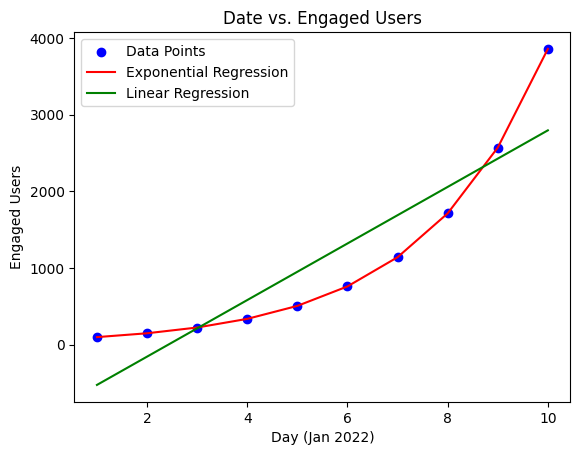

In [57]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Exponential Regression')
plt.plot(X, lr.predict(X), color='green', label='Linear Regression')
plt.xlabel('Day (Jan 2022)')
plt.ylabel('Engaged Users')
plt.title('Date vs. Engaged Users')
plt.legend()
plt.show()

In [58]:
mse_lr = mean_squared_error(y, lr.predict(X))
r2_lr = r2_score(y, lr.predict(X))

mse_exp = mean_squared_error(y, y_pred)
r2_exp = r2_score(y, y_pred)
print(f"Linear Regression | MSE: {mse_lr:.2f}, R^2: {r2_lr:.2f}")
print(f"Exponential Regression | MSE: {mse_exp:.2f}, R^2: {r2_exp:.2f}")

Linear Regression | MSE: 261371.25, R^2: 0.81
Exponential Regression | MSE: 0.38, R^2: 1.00


# **Power Models**

In [59]:
df = pd.DataFrame({
    "User_ID": [id for id in range(1,11)],
    "Followers": [x*10 for x in range(1,11)],
    "Likes": [25,50,100,200,350,550,800,1100,1450,1850],
    "Shares": [5,10,20,40,70,110,160,220,290,370],
    "Comments": [2,4,8,16,28,44,64,88,116,148]
})
df

,User_ID,Followers,Likes,Shares,Comments
0,1,10,25,5,2
1,2,20,50,10,4
2,3,30,100,20,8
3,4,40,200,40,16
4,5,50,350,70,28
5,6,60,550,110,44
6,7,70,800,160,64
7,8,80,1100,220,88
8,9,90,1450,290,116
9,10,100,1850,370,148


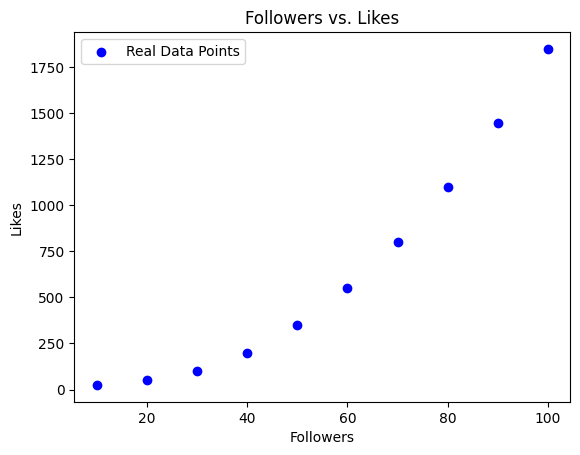

In [60]:
plt.scatter(df['Followers'], df['Likes'], color='blue', label='Real Data Points')
plt.legend()
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Followers vs. Likes')
plt.show()

In [65]:
X = df[['Followers']]
y = df['Likes']

In [66]:
fit = np.polyfit(np.log(df['Followers']), np.log(df['Likes']), 1)
print(fit)

[ 1.98426843 -1.79685033]


$ Ln(y) = e^{-1.7969} \cdot x^{1.9843} $

$ Ln(y) = 0.1658 \cdot x^{1.9843}$

In [67]:
def y_pot(x, fit):
  return np.exp(fit[1])*(x**fit[0])

In [68]:
lr = LinearRegression()
lr.fit(X, y)

y_pred = [y_pot(x, fit) for x in X['Followers']]

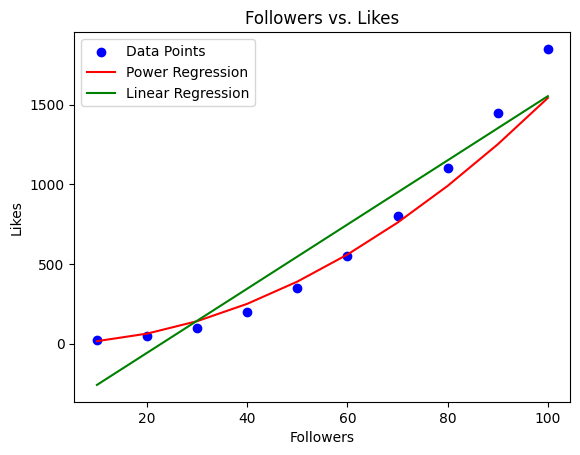

In [70]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Power Regression')
plt.plot(X, lr.predict(X), color='green', label='Linear Regression')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Followers vs. Likes')
plt.legend()
plt.show()

In [71]:
mse_lr = mean_squared_error(y, lr.predict(X))
r2_lr = r2_score(y, lr.predict(X))

mse_exp = mean_squared_error(y, y_pred)
r2_exp = r2_score(y, y_pred)
print(f"Linear Regression | MSE: {mse_lr:.2f}, R^2: {r2_lr:.2f}")
print(f"Power Regression | MSE: {mse_exp:.2f}, R^2: {r2_exp:.2f}")

Linear Regression | MSE: 31540.91, R^2: 0.91
Power Regression | MSE: 15389.74, R^2: 0.96


In [72]:
from scipy.optimize import curve_fit

In [73]:
def power_function(x,a,b):
  return a*np.power(x,b)

In [74]:
likes_params = curve_fit(power_function, df['Followers'], df['Likes'])

In [75]:
likes_params

(array([0.03256245, 2.37805844]),
 array([[ 8.43680633e-06, -5.77975855e-05],
        [-5.77975855e-05,  3.96532319e-04]]))

In [79]:
predicted_likes = power_function(df['Followers'], *likes_params[0])

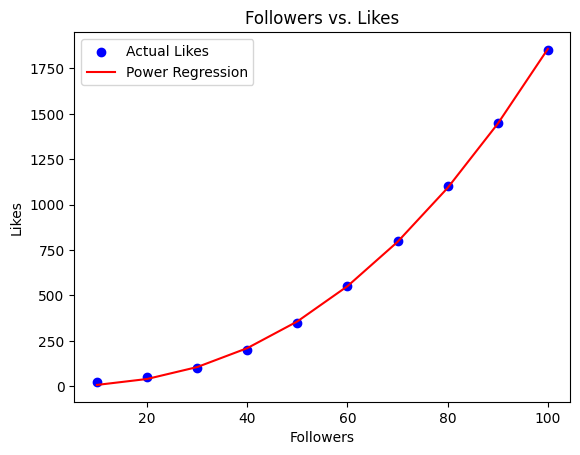

In [80]:
plt.scatter(df['Followers'], df['Likes'], color='blue', label='Actual Likes')
plt.plot(df['Followers'], predicted_likes, color='red', label='Power Regression')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Followers vs. Likes')
plt.legend()
plt.show()

In [81]:
mse_lr = mean_squared_error(y, lr.predict(X))
r2_lr = r2_score(y, lr.predict(X))

mse_exp = mean_squared_error(y, predicted_likes)
r2_exp = r2_score(y, predicted_likes)
print(f"Linear Regression | MSE: {mse_lr:.2f}, R^2: {r2_lr:.2f}")
print(f"Power Regression | MSE: {mse_exp:.2f}, R^2: {r2_exp:.2f}")

Linear Regression | MSE: 31540.91, R^2: 0.91
Power Regression | MSE: 73.29, R^2: 1.00
